# Compare the performance for different sequence length using LightGBM model

## Observation: The optimal sequence length depends on the lead time

# Imports

In [1]:
import pandas as pd
import numpy as np
import Notebooks.src.dataclass_dummy as dataclass_dummy
import src.correlation_coefficient as correlation_coefficient
import src.plot_ts as plot_ts
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as ltb

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

2023-06-25 14:35:59.356612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 14:35:59.467377: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 14:35:59.468449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 14:36:00.148429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Run comparison for sequence length

## Lead time 1

In [3]:
lead_time = 1
climate_models = ["CESM", "FOCI"]


model_name = "LightGBM"
results = dict()
show_plots = False

for seq_length in range(1,24):
    results[f"Sequence_length: {seq_length}"] = dict()

for climate in climate_models:
    for seq_length in range(1,24):
        data = dataclass_dummy.Data(
            lead_time=lead_time,
            seq_length=seq_length,
            # split=[0.8, 0.1, 0.1]
        )

        if climate == "CESM":
            x_train = np.array(data.train_input_CESM)
            y_train = np.array(data.train_target_CESM)

            # x_val = np.array(data.validation_input_CESM)
            # y_val = np.array(data.validation_target_CESM)

            x_test = np.array(data.test_input_CESM)
            y_test = np.array(data.test_target_CESM)
        elif climate == "FOCI":
            x_train = np.array(data.train_input_FOCI)
            y_train = np.array(data.train_target_FOCI)

            # x_val = np.array(data.validation_input_FOCI)
            # y_val = np.array(data.validation_target_FOCI)

            x_test = np.array(data.test_input_FOCI)
            y_test = np.array(data.test_target_FOCI)

        if seq_length != None:
            x_train = x_train.reshape(
                (x_train.shape[0], x_train.shape[1] * x_train.shape[2])
            )
            x_test = x_test.reshape(
                (x_test.shape[0], x_test.shape[1] * x_test.shape[2])
            )

        ltb_model = ltb.LGBMRegressor()
        ltb_model.fit(x_train, y_train)

        predictions = ltb_model.predict(x_test)
        mse = mean_squared_error(predictions, y_test)
        correlation = np.corrcoef(predictions, y_test)[1, 0]
        

        if show_plots:

            print(f"The MSE is: {mse}, the correlation coefficient is: {correlation}")

            plot_ts.plot_ts(
                true=data.test_target_CESM,
                predicted=predictions,
                ts_start=10794,
                ts_end=10994,
                title=f"XGBoost {climate}, lead time = {lead_time}, window_size = {seq_length}",
            )
        results[f"Sequence_length: {seq_length}"]["Modelname"] = model_name
        results[f"Sequence_length: {seq_length}"][f"{climate}_MSE"] = mse
        results[f"Sequence_length: {seq_length}"][f"{climate}_Correlation"] = correlation
        # results[f"Lead_time: {lead_time}"][f"Leadtime"] = lead_time

df = pd.DataFrame.from_dict(results, orient="index")
df

,Modelname,CESM_MSE,CESM_Correlation,FOCI_MSE,FOCI_Correlation
Sequence_length: 1,LightGBM,0.930580,0.402350,0.754374,0.289841
Sequence_length: 2,LightGBM,0.941616,0.391171,0.772057,0.250061
Sequence_length: 3,LightGBM,0.947517,0.386332,0.769331,0.256081
Sequence_length: 4,LightGBM,0.940327,0.393522,0.756723,0.273486
Sequence_length: 5,LightGBM,0.946853,0.387444,0.735286,0.302907
Sequence_length: 6,LightGBM,0.941797,0.393357,0.744707,0.290644
Sequence_length: 7,LightGBM,0.947222,0.388024,0.748505,0.272612
Sequence_length: 8,LightGBM,0.947023,0.389436,0.757623,0.257814
Sequence_length: 9,LightGBM,0.949319,0.386212,0.745379,0.274247
Sequence_length: 10,LightGBM,0.959308,0.376002,0.744108,0.276225


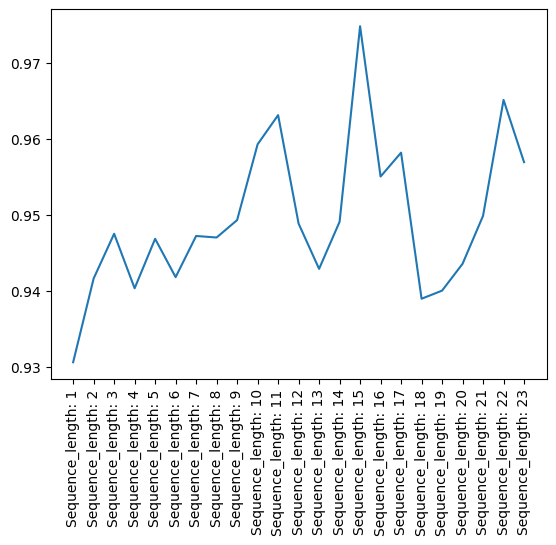

In [15]:
df['CESM_MSE'].plot(kind='line', xticks=range(len(df)))
plt.xticks(rotation=90)
plt.show()

## Lead time 0

In [16]:
lead_time = 0
climate_models = ["CESM", "FOCI"]


model_name = "LightGBM"
results = dict()
show_plots = False

for seq_length in range(1,24):
    results[f"Sequence_length: {seq_length}"] = dict()

for climate in climate_models:
    for seq_length in range(1,24):
        data = dataclass_dummy.Data(
            lead_time=lead_time,
            seq_length=seq_length,
            # split=[0.8, 0.1, 0.1]
        )

        if climate == "CESM":
            x_train = np.array(data.train_input_CESM)
            y_train = np.array(data.train_target_CESM)

            # x_val = np.array(data.validation_input_CESM)
            # y_val = np.array(data.validation_target_CESM)

            x_test = np.array(data.test_input_CESM)
            y_test = np.array(data.test_target_CESM)
        elif climate == "FOCI":
            x_train = np.array(data.train_input_FOCI)
            y_train = np.array(data.train_target_FOCI)

            # x_val = np.array(data.validation_input_FOCI)
            # y_val = np.array(data.validation_target_FOCI)

            x_test = np.array(data.test_input_FOCI)
            y_test = np.array(data.test_target_FOCI)

        if seq_length != None:
            x_train = x_train.reshape(
                (x_train.shape[0], x_train.shape[1] * x_train.shape[2])
            )
            x_test = x_test.reshape(
                (x_test.shape[0], x_test.shape[1] * x_test.shape[2])
            )

        ltb_model = ltb.LGBMRegressor()
        ltb_model.fit(x_train, y_train)

        predictions = ltb_model.predict(x_test)
        mse = mean_squared_error(predictions, y_test)
        correlation = np.corrcoef(predictions, y_test)[1, 0]
        

        if show_plots:

            print(f"The MSE is: {mse}, the correlation coefficient is: {correlation}")

            plot_ts.plot_ts(
                true=data.test_target_CESM,
                predicted=predictions,
                ts_start=10794,
                ts_end=10994,
                title=f"XGBoost {climate}, lead time = {lead_time}, window_size = {seq_length}",
            )
        results[f"Sequence_length: {seq_length}"]["Modelname"] = model_name
        results[f"Sequence_length: {seq_length}"][f"{climate}_MSE"] = mse
        results[f"Sequence_length: {seq_length}"][f"{climate}_Correlation"] = correlation
        # results[f"Lead_time: {lead_time}"][f"Leadtime"] = lead_time

df = pd.DataFrame.from_dict(results, orient="index")
df

,Modelname,CESM_MSE,CESM_Correlation,FOCI_MSE,FOCI_Correlation
Sequence_length: 1,LightGBM,0.744328,0.577164,0.560734,0.550856
Sequence_length: 2,LightGBM,0.742504,0.579679,0.566464,0.546185
Sequence_length: 3,LightGBM,0.724718,0.592213,0.544060,0.568443
Sequence_length: 4,LightGBM,0.728817,0.591121,0.573295,0.538613
Sequence_length: 5,LightGBM,0.734146,0.586571,0.562939,0.549032
Sequence_length: 6,LightGBM,0.729701,0.590841,0.564527,0.546755
Sequence_length: 7,LightGBM,0.728476,0.594448,0.560946,0.545314
Sequence_length: 8,LightGBM,0.751395,0.574444,0.573580,0.529731
Sequence_length: 9,LightGBM,0.738262,0.586430,0.554311,0.549500
Sequence_length: 10,LightGBM,0.758484,0.568151,0.563185,0.539020


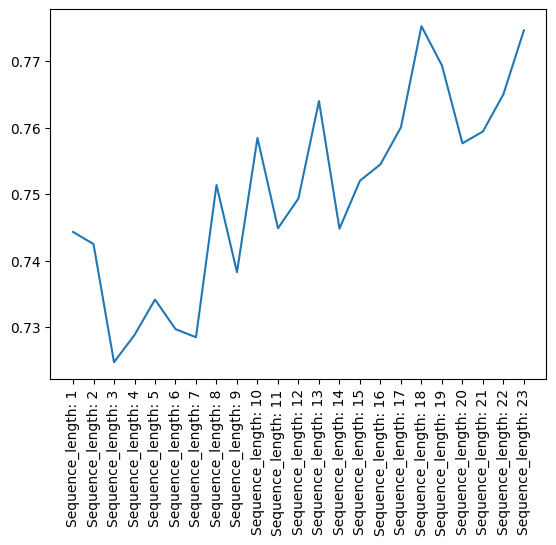

In [17]:
df['CESM_MSE'].plot(kind='line', xticks=range(len(df)))
plt.xticks(rotation=90)
plt.show()

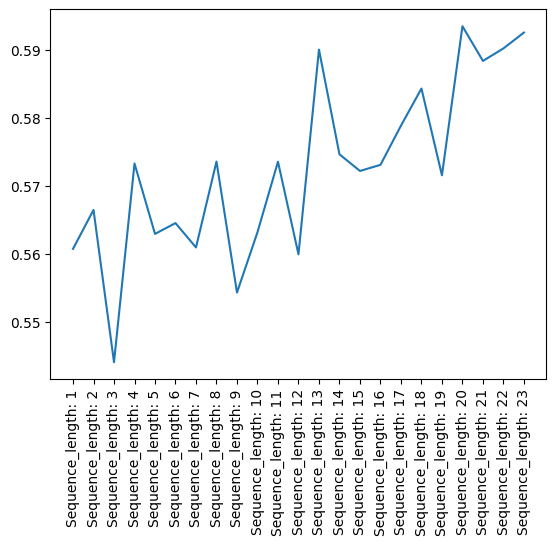

In [18]:
df['FOCI_MSE'].plot(kind='line', xticks=range(len(df)))
plt.xticks(rotation=90)
plt.show()